In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR, adfuller, kpss
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.svar_model import SVAR
import pandas_datareader.data as web



import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

import os
os.chdir('/Users/kyuyeonhwang/Desktop')

import numpy.linalg as npl

In [2]:
china_df = pd.read_excel('var.xlsx')

In [3]:
china_df.head()

,counter,GDP,GS,Capital,Rn,C
0,2000.25,0.601859,1.148397,1.953064,0.074700,-0.274866
1,2000.50,0.360301,0.215851,0.437834,0.060958,0.067698
2,2000.75,0.705272,0.386700,1.184116,0.056361,0.248399
3,2001.00,1.163689,1.418969,-0.237538,0.052200,0.925398
4,2001.25,0.024823,-0.018843,-0.169696,0.047700,-0.458506


In [4]:
print(china_df['counter'].unique())  # 고유값 출력

[2000.25 2000.5  2000.75 2001.   2001.25 2001.5  2001.75 2002.   2002.25
 2002.5  2002.75 2003.   2003.25 2003.5  2003.75 2004.   2004.25 2004.5
 2004.75 2005.   2005.25 2005.5  2005.75 2006.   2006.25 2006.5  2006.75
 2007.   2007.25 2007.5  2007.75 2008.   2008.25 2008.5  2008.75 2009.
 2009.25 2009.5  2009.75 2010.   2010.25 2010.5  2010.75 2011.   2011.25
 2011.5  2011.75 2012.   2012.25 2012.5  2012.75 2013.   2013.25 2013.5
 2013.75 2014.   2014.25 2014.5  2014.75 2015.   2015.25 2015.5  2015.75
 2016.   2016.25 2016.5  2016.75 2017.   2017.25 2017.5  2017.75 2018.
 2018.25 2018.5  2018.75 2019.   2019.25 2019.5  2019.75 2020.   2020.25
 2020.5  2020.75 2021.   2021.25 2021.5  2021.75 2022.   2022.25 2022.5
 2022.75 2023.   2023.25 2023.5  2023.75]


In [5]:
def convert_to_quarter(value):
    year = int(value)  # 정수 부분은 연도
    fraction = value - year  # 소수 부분은 분기 계산
    if fraction < 0.25:
        quarter = 'Q1'
    elif fraction < 0.50:
        quarter = 'Q2'
    elif fraction < 0.75:
        quarter = 'Q3'
    else:
        quarter = 'Q4'
    return f"{year}{quarter}"

In [6]:
# counter를 분기 형식으로 변환
china_df['counter'] = china_df['counter'].apply(convert_to_quarter)

In [7]:
print(china_df['counter'].unique())  # 고유값 출력

['2000Q2' '2000Q3' '2000Q4' '2001Q1' '2001Q2' '2001Q3' '2001Q4' '2002Q1'
 '2002Q2' '2002Q3' '2002Q4' '2003Q1' '2003Q2' '2003Q3' '2003Q4' '2004Q1'
 '2004Q2' '2004Q3' '2004Q4' '2005Q1' '2005Q2' '2005Q3' '2005Q4' '2006Q1'
 '2006Q2' '2006Q3' '2006Q4' '2007Q1' '2007Q2' '2007Q3' '2007Q4' '2008Q1'
 '2008Q2' '2008Q3' '2008Q4' '2009Q1' '2009Q2' '2009Q3' '2009Q4' '2010Q1'
 '2010Q2' '2010Q3' '2010Q4' '2011Q1' '2011Q2' '2011Q3' '2011Q4' '2012Q1'
 '2012Q2' '2012Q3' '2012Q4' '2013Q1' '2013Q2' '2013Q3' '2013Q4' '2014Q1'
 '2014Q2' '2014Q3' '2014Q4' '2015Q1' '2015Q2' '2015Q3' '2015Q4' '2016Q1'
 '2016Q2' '2016Q3' '2016Q4' '2017Q1' '2017Q2' '2017Q3' '2017Q4' '2018Q1'
 '2018Q2' '2018Q3' '2018Q4' '2019Q1' '2019Q2' '2019Q3' '2019Q4' '2020Q1'
 '2020Q2' '2020Q3' '2020Q4' '2021Q1' '2021Q2' '2021Q3' '2021Q4' '2022Q1'
 '2022Q2' '2022Q3' '2022Q4' '2023Q1' '2023Q2' '2023Q3' '2023Q4']


In [8]:
# PeriodIndex로 변환하여 인덱스로 설정
china_df['counter'] = pd.PeriodIndex(china_df['counter'], freq='Q')
china_df = china_df.set_index('counter')  # 인덱스로 설정

In [9]:
# 결과 확인
print(china_df.head())
print(china_df.index)

              GDP        GS   Capital        Rn         C
counter                                                  
2000Q2   0.601859  1.148397  1.953064  0.074700 -0.274866
2000Q3   0.360301  0.215851  0.437834  0.060958  0.067698
2000Q4   0.705272  0.386700  1.184116  0.056361  0.248399
2001Q1   1.163689  1.418969 -0.237538  0.052200  0.925398
2001Q2   0.024823 -0.018843 -0.169696  0.047700 -0.458506
PeriodIndex(['2000Q2', '2000Q3', '2000Q4', '2001Q1', '2001Q2', '2001Q3',
             '2001Q4', '2002Q1', '2002Q2', '2002Q3', '2002Q4', '2003Q1',
             '2003Q2', '2003Q3', '2003Q4', '2004Q1', '2004Q2', '2004Q3',
             '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4', '2006Q1',
             '2006Q2', '2006Q3', '2006Q4', '2007Q1', '2007Q2', '2007Q3',
             '2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1',
             '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3',
             '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
          

In [10]:
def perform_df_test(data, column, regression_type):
    test_result = adfuller(data[column], maxlag=0,
                           autolag=None, regression=regression_type)
    test_stat, p_value, nobs, critical_values = test_result[
        0], test_result[1], test_result[3], test_result[4]

    print(
        f"Augmented Dickey-Fuller test ({column}) without lag ({regression_type}):")
    print(f"Test statistic = {test_stat:.4f}")
    print(f"P-value = {p_value:.4f}")
    print(f"Number of observations used = {nobs}")
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f"\t{key}: {value:.3f}")
    
    if p_value < 0.05:
        print("Stationary")
    else:
        print("Non-stationary")

    print("")

    return test_stat, p_value, nobs, critical_values

In [11]:
for column in ['GDP', 'GS', 'Capital', 'Rn', 'C']:
    for regression_type in ['n', 'c', 'ctt']:
        result = perform_df_test(china_df, column, regression_type)

Augmented Dickey-Fuller test (GDP) without lag (n):
Test statistic = -3.7125
P-value = 0.0002
Number of observations used = 94
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GDP) without lag (c):
Test statistic = -4.9992
P-value = 0.0000
Number of observations used = 94
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Stationary

Augmented Dickey-Fuller test (GDP) without lag (ctt):
Test statistic = -5.4242
P-value = 0.0002
Number of observations used = 94
Critical Values:
	1%: -4.499
	5%: -3.897
	10%: -3.593
Stationary

Augmented Dickey-Fuller test (GS) without lag (n):
Test statistic = -5.9352
P-value = 0.0000
Number of observations used = 94
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GS) without lag (c):
Test statistic = -11.5242
P-value = 0.0000
Number of observations used = 94
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Stationary

Augmented Dickey-Fuller test (GS) 

In [12]:
VAR_model_df3_std = VAR(endog=china_df)
lag_select = VAR_model_df3_std.select_order(maxlags=5)
lag_select.summary()

,AIC,BIC,FPE,HQIC
0,-12.66,-12.52,3.165e-06,-12.61
1,-15.74*,-14.91*,1.463e-07*,-15.40*
2,-15.73,-14.20,1.485e-07,-15.11
3,-15.56,-13.34,1.775e-07,-14.67
4,-15.70,-12.78,1.586e-07,-14.52
5,-15.63,-12.02,1.772e-07,-14.17


In [13]:
results_tfp = VAR_model_df3_std.fit(ic='fpe')

In [14]:
lag_order = results_tfp.k_ar
lag_order

2

In [15]:
results_tfp.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 12, Dec, 2024
Time:                     21:00:58
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -14.2847
Nobs:                     93.0000    HQIC:                  -15.1777
Log likelihood:           129.080    FPE:                1.40659e-07
AIC:                     -15.7825    Det(Omega_mle):     8.04293e-08
--------------------------------------------------------------------
Results for equation GDP
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.731734         0.301951            2.423           0.015
L1.GDP             0.259431         0.223128            1.163           0.245
L1.GS             -0.954689         0.215270           -4.435           0.

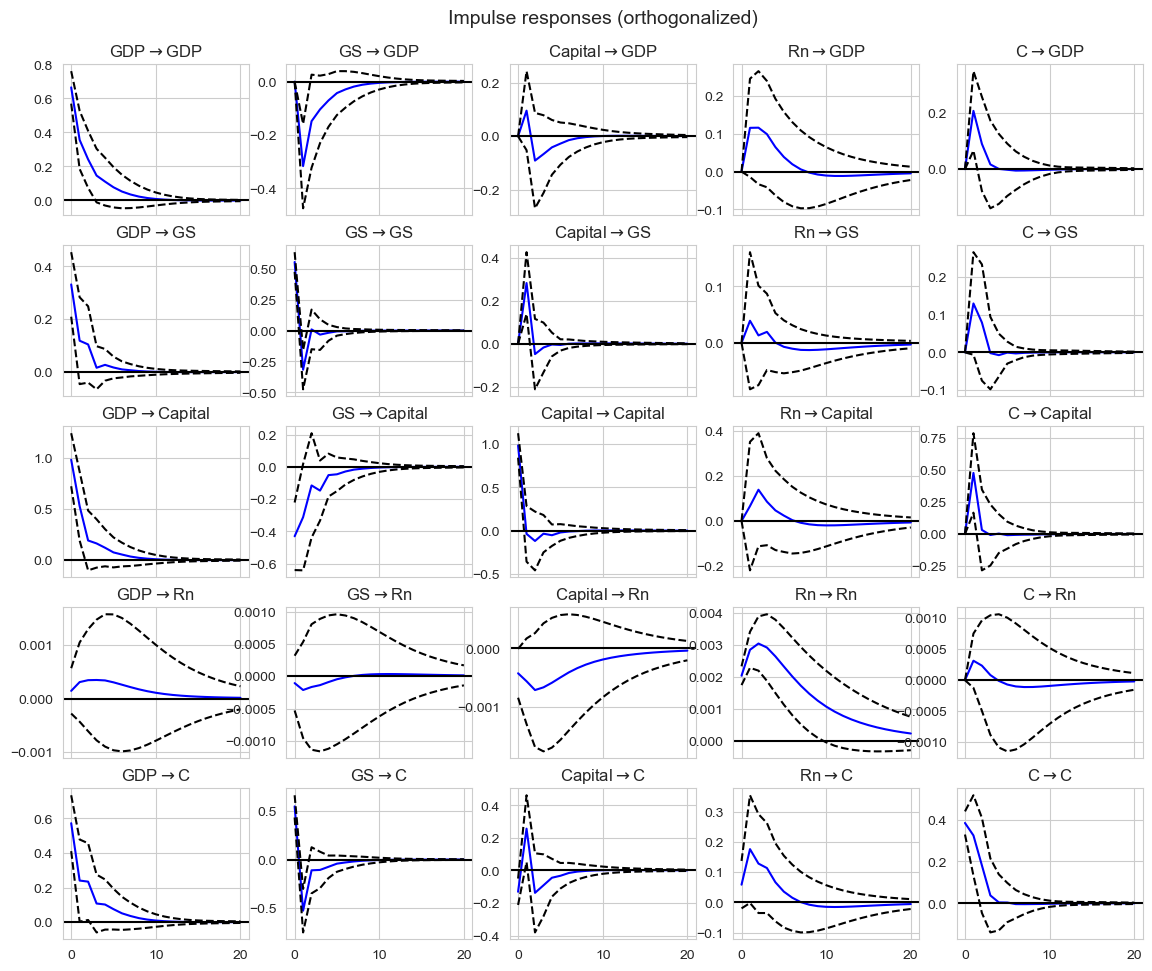

In [16]:
irf_var_tfp = results_tfp.irf(periods=20)
irf_var_tfp.plot(orth=True, figsize=(12,10))
plt.show()

In [17]:
china_df2 = pd.read_excel('var2.xlsx')

In [18]:
# counter를 분기 형식으로 변환
china_df2['counter'] = china_df2['counter'].apply(convert_to_quarter)

In [19]:
china_df2.head()

,counter,GDP,GS,Capital,Rn,C
0,2000Q2,0.601859,2.127244,1.953064,0.074700,-0.274866
1,2000Q3,0.360301,1.664690,0.437834,0.060958,0.067698
2,2000Q4,0.705272,3.815256,1.184116,0.056361,0.248399
3,2001Q1,1.163689,0.250793,-0.237538,0.052200,0.925398
4,2001Q2,0.024823,3.066960,-0.169696,0.047700,-0.458506


In [20]:
# PeriodIndex로 변환하여 인덱스로 설정
china_df2['counter'] = pd.PeriodIndex(china_df2['counter'], freq='Q')
china_df2 = china_df2.set_index('counter')  # 인덱스로 설정

In [21]:
for column in ['GDP', 'GS', 'Capital', 'Rn', 'C']:
    for regression_type in ['n', 'c', 'ctt']:
        result = perform_df_test(china_df2, column, regression_type)

Augmented Dickey-Fuller test (GDP) without lag (n):
Test statistic = -3.7125
P-value = 0.0002
Number of observations used = 94
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GDP) without lag (c):
Test statistic = -4.9992
P-value = 0.0000
Number of observations used = 94
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Stationary

Augmented Dickey-Fuller test (GDP) without lag (ctt):
Test statistic = -5.4242
P-value = 0.0002
Number of observations used = 94
Critical Values:
	1%: -4.499
	5%: -3.897
	10%: -3.593
Stationary

Augmented Dickey-Fuller test (GS) without lag (n):
Test statistic = -7.0133
P-value = 0.0000
Number of observations used = 94
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GS) without lag (c):
Test statistic = -11.8185
P-value = 0.0000
Number of observations used = 94
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Stationary

Augmented Dickey-Fuller test (GS) 

In [22]:
VAR_df2 = VAR(endog=china_df2)
lag_select = VAR_df2.select_order(maxlags=5)
lag_select.summary()

,AIC,BIC,FPE,HQIC
0,-8.287,-8.148,0.0002518,-8.231
1,-10.92,-10.09*,1.802e-05,-10.59*
2,-11.04*,-9.516,1.609e-05*,-10.43
3,-10.80,-8.580,2.075e-05,-9.906
4,-10.70,-7.780,2.363e-05,-9.521
5,-10.43,-6.817,3.221e-05,-8.972


In [23]:
results_df2 = VAR_df2.fit(ic='fpe')

In [24]:
lag_order_df2 = results_df2.k_ar
lag_order_df2

2

In [25]:
results_df2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 12, Dec, 2024
Time:                     21:00:59
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -9.59310
Nobs:                     93.0000    HQIC:                  -10.4861
Log likelihood:          -89.0806    FPE:                1.53359e-05
AIC:                     -11.0909    Det(Omega_mle):     8.76914e-06
--------------------------------------------------------------------
Results for equation GDP
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.039713         0.231659            0.171           0.864
L1.GDP             0.270583         0.243037            1.113           0.266
L1.GS              0.008080         0.026467            0.305           0.

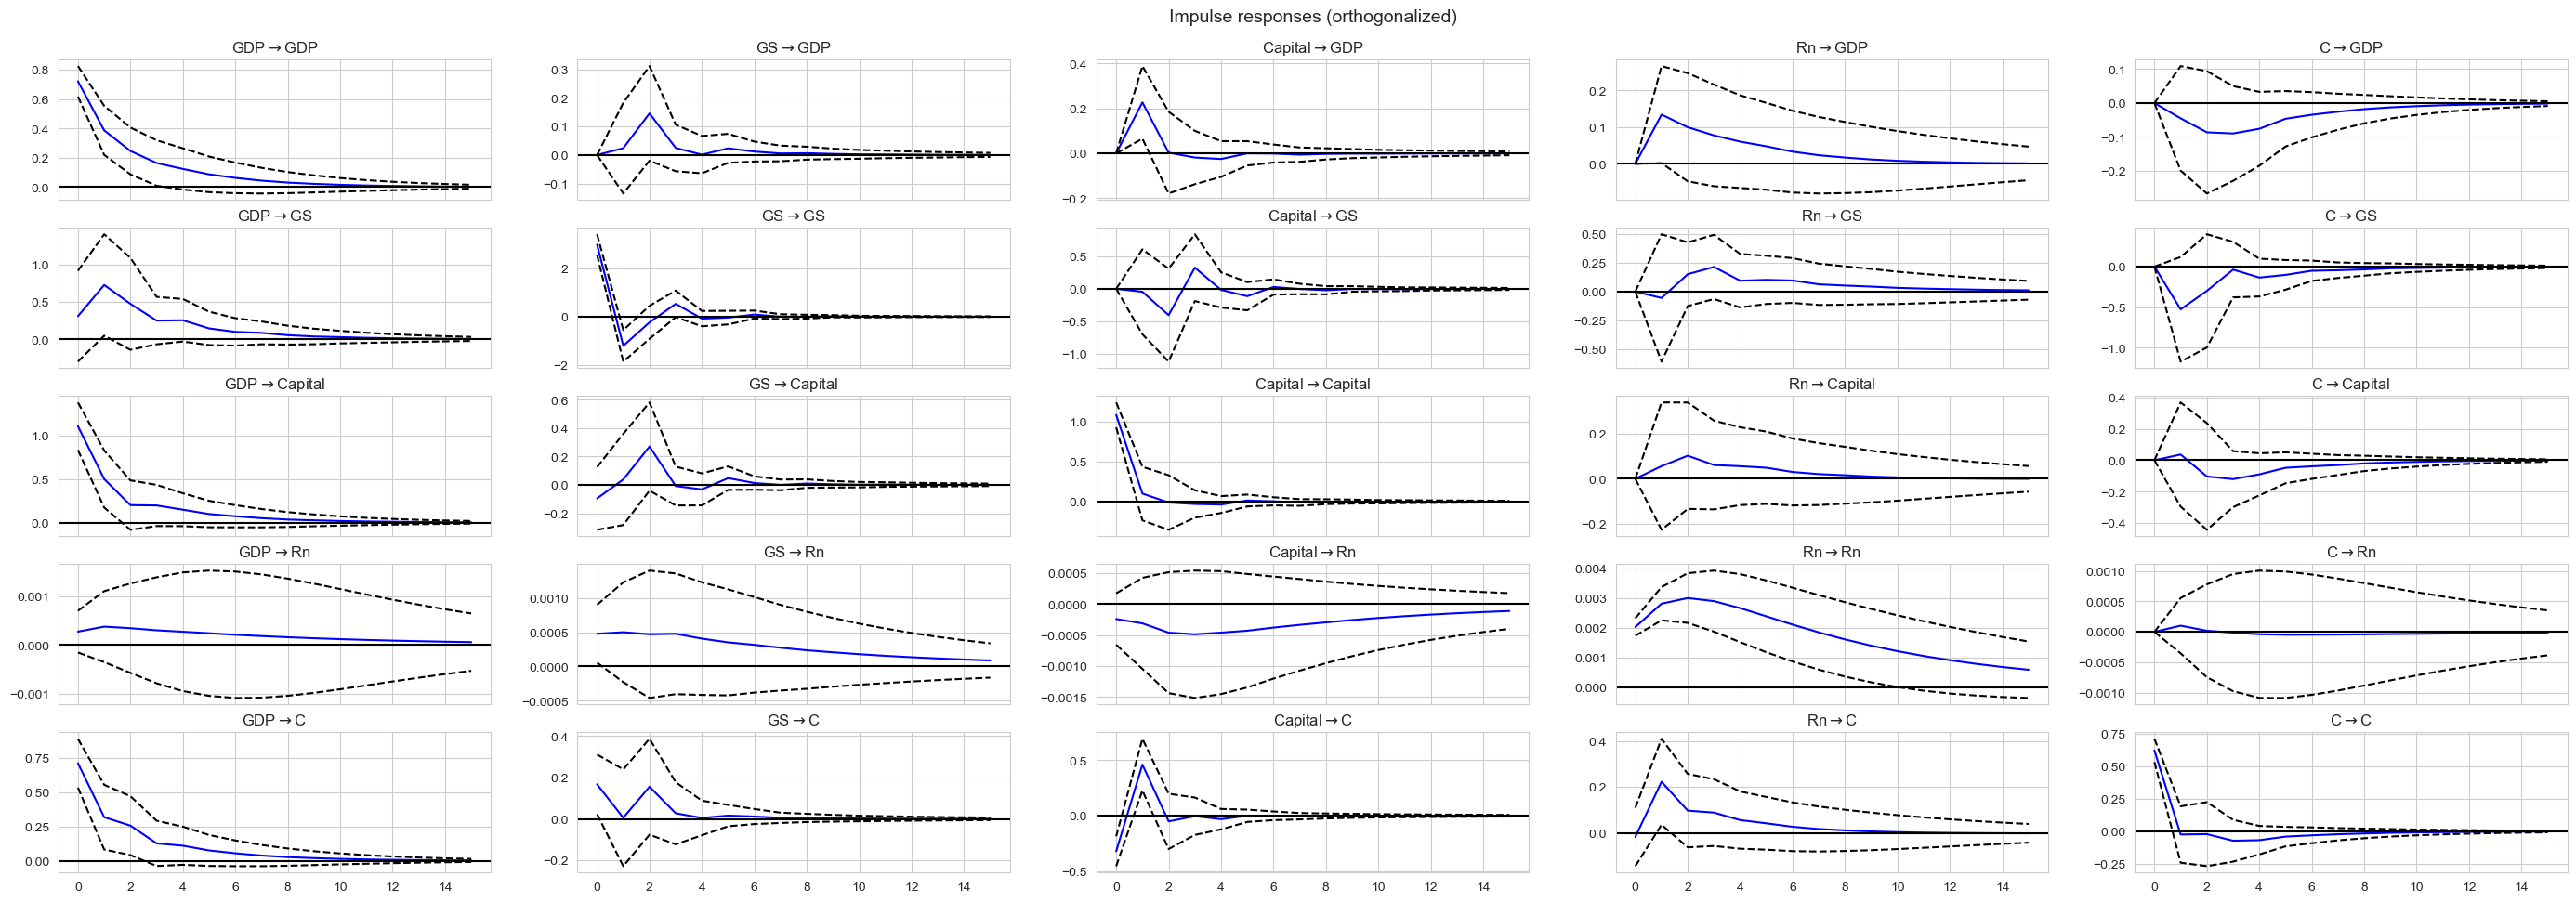

In [26]:
irf_var_df2 = results_df2.irf(periods=15)
irf_var_df2.plot(orth=True, figsize=(30,10))
plt.show()

In [27]:
china_df2_cut = china_df2.drop(['C'], axis=1)

In [28]:
china_df2_cut.head()

,GDP,GS,Capital,Rn
counter,,,,
2000Q2,0.601859,2.127244,1.953064,0.074700
2000Q3,0.360301,1.664690,0.437834,0.060958
2000Q4,0.705272,3.815256,1.184116,0.056361
2001Q1,1.163689,0.250793,-0.237538,0.052200
2001Q2,0.024823,3.066960,-0.169696,0.047700


In [29]:
VAR_df3 = VAR(endog=china_df2_cut)
lag_select = VAR_df3.select_order(maxlags=5)
lag_select.summary()

,AIC,BIC,FPE,HQIC
0,-7.407,-7.296,0.0006068,-7.363
1,-10.03,-9.471*,4.424e-05,-9.802
2,-10.32*,-9.319,3.309e-05*,-9.916*
3,-10.12,-8.671,4.077e-05,-9.533
4,-10.07,-8.183,4.302e-05,-9.311
5,-9.950,-7.617,4.944e-05,-9.009


In [30]:
results_df3 = VAR_df3.fit(ic='hqic')
lag_order_df3 = results_df3.k_ar
lag_order_df3

2

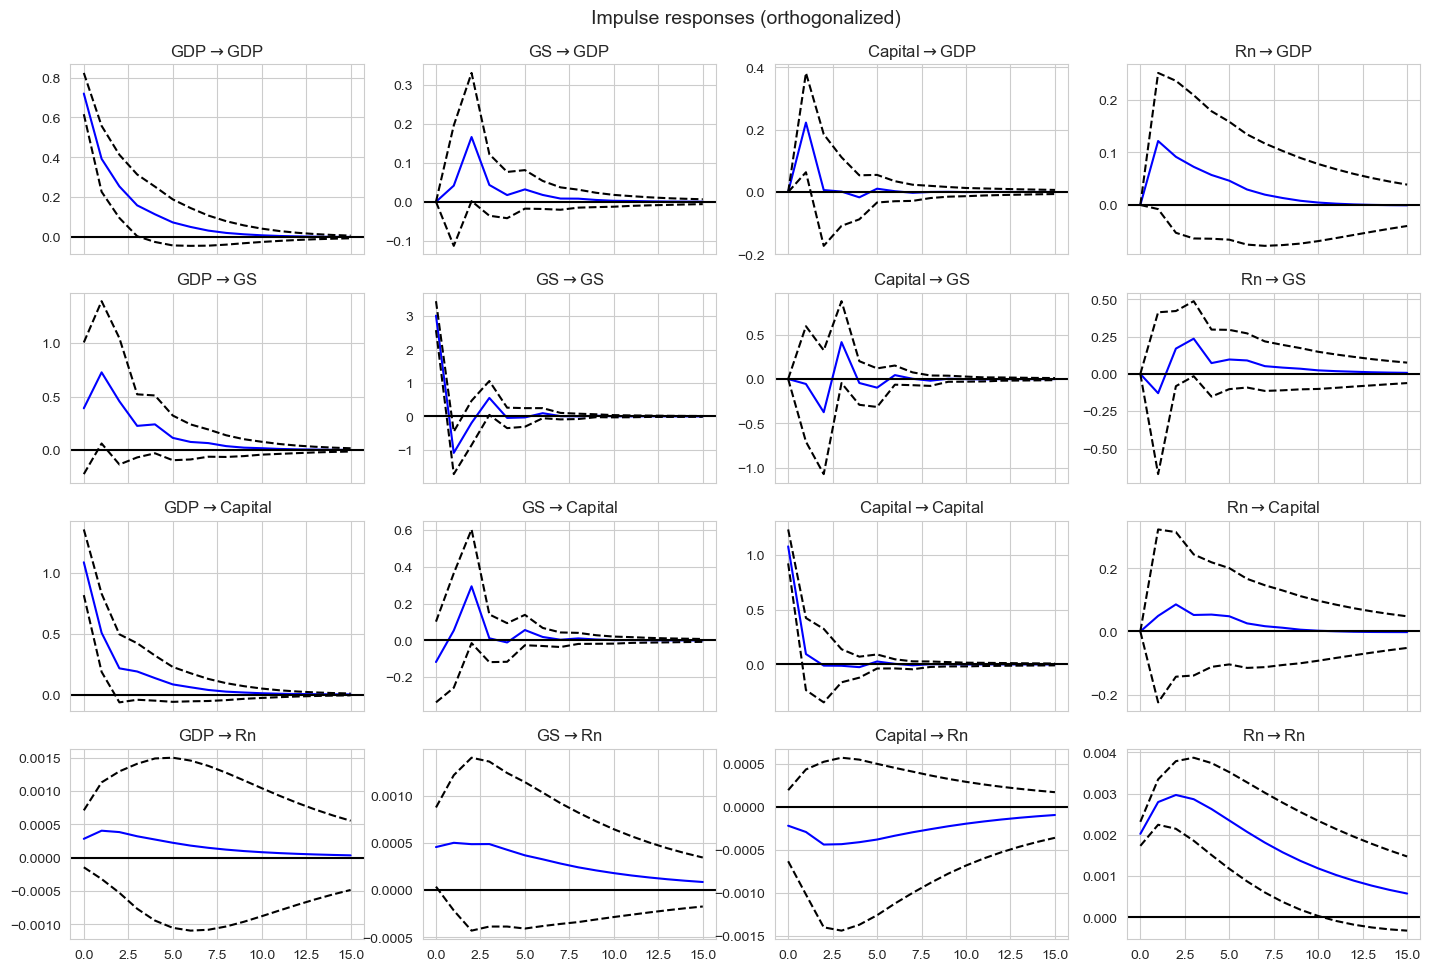

In [31]:
results_df3.summary()

irf_var_df3 = results_df3.irf(periods=15)
irf_var_df3.plot(orth=True, figsize=(15,10))
plt.show()

In [32]:
china_ma = china_df2_cut.rolling(window=2, win_type='gaussian').mean(std=1)

In [33]:
china_ma

,GDP,GS,Capital,Rn
counter,,,,
2000Q2,NaN,NaN,NaN,NaN
2000Q3,0.481080,1.895967,1.195449,0.067829
2000Q4,0.532787,2.739973,0.810975,0.058660
2001Q1,0.934481,2.033025,0.473289,0.054281
2001Q2,0.594256,1.658877,-0.203617,0.049950
...,...,...,...,...
2022Q4,-0.195891,0.776105,-1.186329,0.015000
2023Q1,-0.067915,1.379186,0.042171,0.015000
2023Q2,-0.157446,1.944889,-0.352779,0.015000


In [34]:
china_ma.dropna(inplace=True)

In [35]:
china_ma.to_excel('china_ma.xlsx', index=False)

In [36]:
for column in ['GDP', 'GS', 'Capital', 'Rn']:
    for regression_type in ['n', 'c', 'ctt']:
        result = perform_df_test(china_ma, column, regression_type)

Augmented Dickey-Fuller test (GDP) without lag (n):
Test statistic = -2.2818
P-value = 0.0216
Number of observations used = 93
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GDP) without lag (c):
Test statistic = -3.0797
P-value = 0.0281
Number of observations used = 93
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
Stationary

Augmented Dickey-Fuller test (GDP) without lag (ctt):
Test statistic = -3.4421
P-value = 0.1283
Number of observations used = 93
Critical Values:
	1%: -4.500
	5%: -3.897
	10%: -3.593
Non-stationary

Augmented Dickey-Fuller test (GS) without lag (n):
Test statistic = -3.4404
P-value = 0.0006
Number of observations used = 93
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GS) without lag (c):
Test statistic = -6.7392
P-value = 0.0000
Number of observations used = 93
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
Stationary

Augmented Dickey-Fuller test (G

In [37]:
for column in ['GDP', 'GS', 'Capital', 'Rn']:
    for regression_type in ['n', 'c', 'ctt']:
        result = perform_df_test(china_ma, column, regression_type)

Augmented Dickey-Fuller test (GDP) without lag (n):
Test statistic = -2.2818
P-value = 0.0216
Number of observations used = 93
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GDP) without lag (c):
Test statistic = -3.0797
P-value = 0.0281
Number of observations used = 93
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
Stationary

Augmented Dickey-Fuller test (GDP) without lag (ctt):
Test statistic = -3.4421
P-value = 0.1283
Number of observations used = 93
Critical Values:
	1%: -4.500
	5%: -3.897
	10%: -3.593
Non-stationary

Augmented Dickey-Fuller test (GS) without lag (n):
Test statistic = -3.4404
P-value = 0.0006
Number of observations used = 93
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GS) without lag (c):
Test statistic = -6.7392
P-value = 0.0000
Number of observations used = 93
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
Stationary

Augmented Dickey-Fuller test (G

In [38]:
VAR_ma = VAR(endog=china_ma)
lag_select = VAR_ma.select_order(maxlags=5)
lag_select.summary()

,AIC,BIC,FPE,HQIC
0,-9.639,-9.527,6.516e-05,-9.594
1,-13.23,-12.67,1.805e-06,-13.00
2,-14.63,-13.62*,4.448e-07,-14.22
3,-14.88,-13.43,3.470e-07,-14.30*
4,-14.99,-13.09,3.150e-07,-14.22
5,-15.05*,-12.70,3.023e-07*,-14.10


In [39]:
results_ma = VAR_ma.fit(ic='bic')

lag_order_ma = results_ma.k_ar
lag_order_ma

2

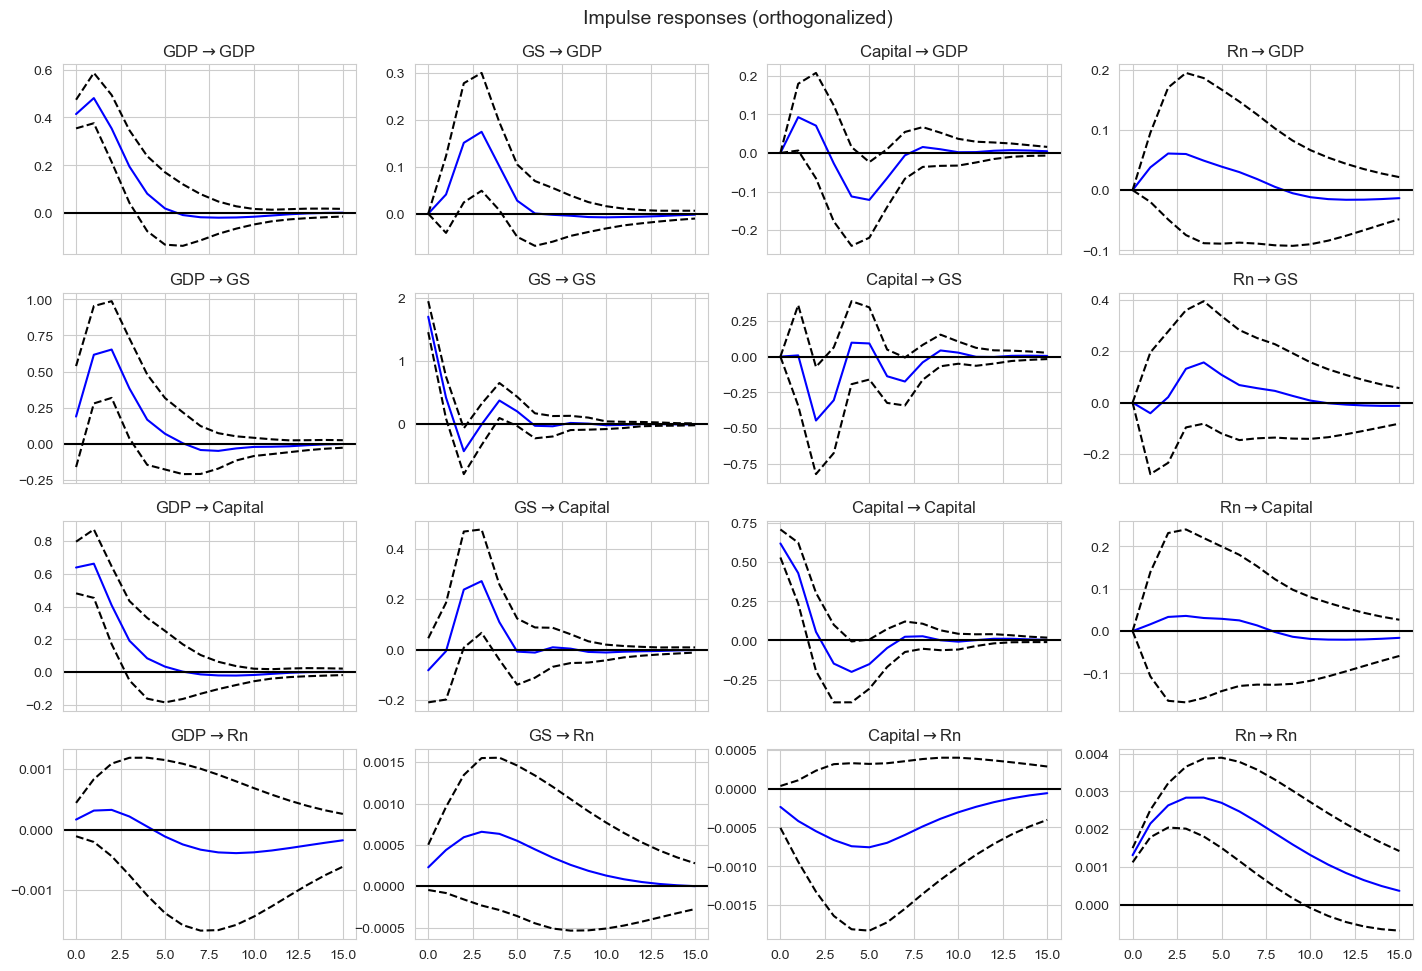

In [40]:
results_ma.summary()

irf_var_ma = results_ma.irf(periods=15)
figsvar = irf_var_ma.plot(orth=True, figsize=(15,10))
plt.show()

In [41]:
figsvar.savefig('SVAR(China).png',bbox_inches='tight', dpi=800)

In [42]:
#define structural inputs
A = np.asarray([[1, 0, 0, 0],['E', 1, 0, 0],['E', 'E', 1, 0],['E', 'E', 'E', 1]])
B = np.asarray([['E', 0, 0, 0], [0, 'E', 0, 0], [0, 0, 'E', 0],[0, 0, 0, 'E']])
SVAR_model_ma = SVAR(china_ma, svar_type='AB', A=A, B=B)
res_ma = SVAR_model_ma.fit(maxlags=4, maxiter=100, maxfun=100, solver='bfgs')

In [43]:
res_ma.A, res_ma.B

(array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-3.77811859e-01,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-1.55887983e+00,  5.06527395e-02,  1.00000000e+00,
          0.00000000e+00],
        [-4.07546358e-04, -2.12393076e-04,  1.82311128e-04,
          1.00000000e+00]]),
 array([[4.12926961e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.58724222e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 5.46794248e-01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.10165998e-03]]))

In [44]:
res_ma.sigma_u

array([[ 1.70508680e-01,  6.44199955e-02,  2.62539497e-01,
         3.53079038e-05],
       [ 6.44199955e-02,  2.54367631e+00, -2.84213364e-02,
         5.71682457e-04],
       [ 2.62539497e-01, -2.84213364e-02,  7.09691097e-01,
        -2.84275269e-05],
       [ 3.53079038e-05,  5.71682457e-04, -2.84275269e-05,
         1.35465696e-06]])

In [ ]:
P = np.dot(npl.inv(res_ma.A), res_ma.B)
np.dot(P,P.T)

array([[ 1.70508676e-01,  6.44201997e-02,  2.62539476e-01,
         3.53087260e-05],
       [ 6.44201997e-02,  2.54367657e+00, -2.84208368e-02,
         5.71694945e-04],
       [ 2.62539476e-01, -2.84208368e-02,  7.09691039e-01,
        -2.84239554e-05],
       [ 3.53087260e-05,  5.71694945e-04, -2.84239554e-05,
         1.35465070e-06]])